# AMAZON WEB SCRAPPING AND PRICE TRACKING

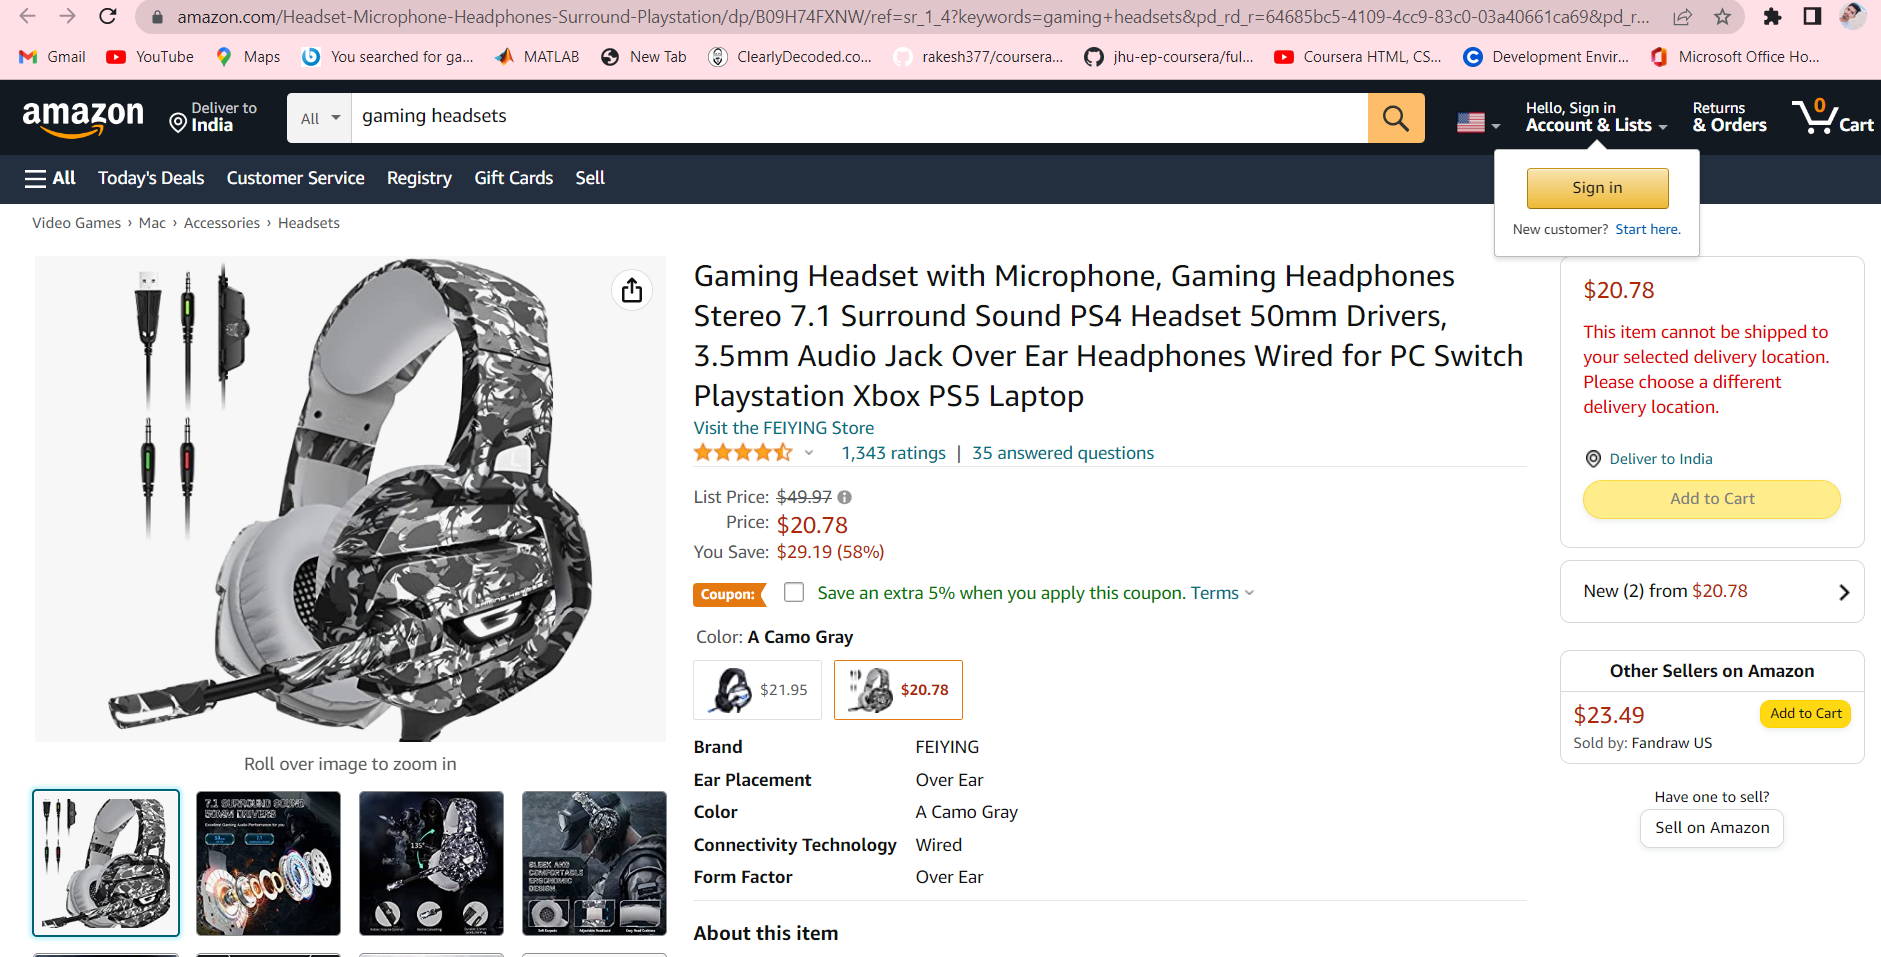

### Link=https://www.amazon.com/Headset-Microphone-Headphones-Surround-Playstation/dp/B09H74FXNW/ref=sr_1_4?keywords=gaming+headsets&pd_rd_r=64685bc5-4109-4cc9-83c0-03a40661ca69&pd_rd_w=E3V4N&pd_rd_wg=EFnnL&pf_rd_p=12129333-2117-4490-9c17-6d31baf0582a&pf_rd_r=APXD55955ZTM5K3M985Z&qid=1656743006&sr=8-4

In [133]:
from bs4 import BeautifulSoup
import requests
import time
import datetime
#import smtplib

# Connect to Website and pull in data

In [134]:
url="https://www.amazon.com/Headset-Microphone-Headphones-Surround-Playstation/dp/B09H74FXNW/ref=sr_1_4?keywords=gaming+headsets&pd_rd_r=64685bc5-4109-4cc9-83c0-03a40661ca69&pd_rd_w=E3V4N&pd_rd_wg=EFnnL&pf_rd_p=12129333-2117-4490-9c17-6d31baf0582a&pf_rd_r=APXD55955ZTM5K3M985Z&qid=1656743006&sr=8-4"
headers= {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}
page=requests.get(url,headers=headers)
soup1 = BeautifulSoup(page.content, "html.parser")
soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

title = soup2.find(id='productTitle').get_text()
price = soup2.find(id='price_inside_buybox').get_text()


print(title)
print(price)
print(price)


            Gaming Headset with Microphone, Gaming Headphones Stereo 7.1 Surround Sound PS4 Headset 50mm Drivers, 3.5mm Audio Jack Over Ear Headphones Wired for PC Switch Playstation Xbox PS5 Laptop
           

                    $20.78
                   

                    $20.78
                   


# Cleaning Data a bit

In [135]:
price = price.lstrip()[1:]
title = title.strip()

print(title)
print(price)

Gaming Headset with Microphone, Gaming Headphones Stereo 7.1 Surround Sound PS4 Headset 50mm Drivers, 3.5mm Audio Jack Over Ear Headphones Wired for PC Switch Playstation Xbox PS5 Laptop
20.78
                   


# Creating a Timestamp

In [136]:
import datetime

today = datetime.date.today()

print(today)

2022-07-02


# Creating and Appending data to a CSV File

In [137]:
import csv 

header = ['Title', 'Price', 'Date']
data = [title, price, today]


with open('AmazonWebScraperDataset.csv', 'w', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerow(data)

In [144]:
import pandas as pd

df=pd.read_csv('AmazonWebScraperDataset.csv')
print(df)

                                               Title  Price        Date
0  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
1  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
2  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
3  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02


#  Appending data to  CSV File Again

In [143]:
with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
    writer = csv.writer(f)
    #writer.writerow(header)
    writer.writerow(data)

# Let's Write a Function to automate the Process

In [160]:

def check_price():
    URL = 'https://www.amazon.com/Headset-Microphone-Headphones-Surround-Playstation/dp/B09H74FXNW/ref=sr_1_4?keywords=gaming+headsets&pd_rd_r=64685bc5-4109-4cc9-83c0-03a40661ca69&pd_rd_w=E3V4N&pd_rd_wg=EFnnL&pf_rd_p=12129333-2117-4490-9c17-6d31baf0582a&pf_rd_r=APXD55955ZTM5K3M985Z&qid=1656743006&sr=8-4'

    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36", "Accept-Encoding":"gzip, deflate", "Accept":"text/html,application/xhtml+xml,application/xml;q=0.9,*/*;q=0.8", "DNT":"1","Connection":"close", "Upgrade-Insecure-Requests":"1"}

    page = requests.get(URL, headers=headers)

    soup1 = BeautifulSoup(page.content, "html.parser")

    soup2 = BeautifulSoup(soup1.prettify(), "html.parser")

    title = soup2.find(id='productTitle').get_text()

    price = soup2.find(id='price_inside_buybox').get_text()

    price = price.strip()[1:]
    title = title.strip()

    import datetime

    today = datetime.date.today()
    
    import csv 

    header = ['Title', 'Price', 'Date']
    data = [title, price, today]

    with open('AmazonWebScraperDataset.csv', 'a+', newline='', encoding='UTF8') as f:
        writer = csv.writer(f)
        writer.writerow(data)
        
    if(price<21):
        send_mail()

In [146]:
while(True):
    check_price()
    time.sleep(1) #updating the data every 1 seconds

KeyboardInterrupt: 

In [147]:
import pandas as pd

df=pd.read_csv('AmazonWebScraperDataset.csv')
print(df)

                                               Title  Price        Date
0  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
1  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
2  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
3  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02
4  Gaming Headset with Microphone, Gaming Headpho...  20.78  2022-07-02


### Data is getting updated every second 